loading ...  mytestnums/my_a_0.png
0.053757988
0.8467325
loading ...  mytestnums/my_a_1.png
0.043504722
0.7484468
loading ...  mytestnums/my_a_3.png
0.01
0.95109016
loading ...  mytestnums/my_a_2.png
0.03529744
0.8047021
loading ...  mytestnums/my_a_6.png
0.03917979
0.70253414
loading ...  mytestnums/my_a_7.png
0.030972444
0.66915363
loading ...  mytestnums/my_a_5.png
0.056755178
1.0
loading ...  mytestnums/my_a_4.png
0.07933107
0.8741613
loading ...  mytestnums/my_b_1.png
0.06291649
0.9380726
loading ...  mytestnums/my_b_0.png
0.044665538
0.98010296
loading ...  mytestnums/my_b_2.png
0.04378037
0.98394257
loading ...  mytestnums/my_b_3.png
0.046268925
0.97233826
loading ...  mytestnums/my_b_7.png
0.042829156
0.9976783
loading ...  mytestnums/my_b_6.png
0.05348234
0.979342
loading ...  mytestnums/my_b_4.png
0.048990466
0.939843
loading ...  mytestnums/my_b_5.png
0.0533154
0.9450336
loading ...  mytestnums/my_b_8.png
0.024811186
0.981388
loading ...  mytestnums/my_b_9.png
0.048547886
0.

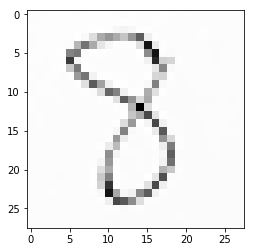

In [9]:
import imageio
import glob
import numpy
# scipy.special needed for sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are not printed in separate window
%matplotlib inline

# defines neural network class
class neuralNetwork:
    
    # initialise neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set numer of nodes in each input, hidden, and output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, w_ih and w_ho
        # weights inside the arrays are w_i_j, where link is from node i to node j in next layer
        # w11 w21
        # w12 w22 etc
        
        self.wih = (numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes)))
        self.who = (numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes)))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2) .T
        targets = numpy.array(targets_list, ndmin=2) .T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    #query the neural network
    def query(self, inputs_list):
        
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2) .T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

# number of input, hidden, and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate is 0.03
learning_rate = 0.03

# create instance of neural network object
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the mnist training CSV into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs = number of times training set is used for training
epochs = 16

for e in range(epochs):
    # go through all records in training set
    for record in training_data_list:
        # split record by commas
        all_values = record.split(',')
        # scale and shift inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create target output values (all 0.01 except target which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# load mnist test CSV into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# test the neural network

# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('mytestnums/my_*.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

# test the neural network with our own images

for item in range(20):

    # plot image
    matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

    # correct answer is first value
    correct_label = our_own_dataset[item][0]
    # data is remaining values
    inputs = our_own_dataset[item][1:]

    # query the network
    outputs = n.query(inputs)
    print (outputs)

    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print("network says ", label)
    # append correct or incorrect to list
    if (label == correct_label):
        print ("match!")
    else:
        print ("no match!")
        pass